In [2]:
from keras.applications import vgg16
from keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import time

In [3]:
imgs_path = "final/"
imgs_model_width, imgs_model_height = 224, 224

In [4]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

import random
random.shuffle(files)

number of images: 377


In [6]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [7]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

12/12 [==============================] - 29s 2s/step
features successfully extracted!


(377, 4096)

In [26]:
time_ = []

In [27]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):
    start = time.time()
    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    
    importedImage = []
    test = load_img(given_img, target_size=(224, 224))
    numpy_image = img_to_array(test)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImage.append(image_batch)
    image = np.vstack(importedImage)
    processed_img = preprocess_input(image.copy())
    img_features = feat_extractor.predict(processed_img)
    
    test = np.vstack([imgs_features, img_features])
    
    files_copy = files.copy()
    files_copy.append(given_img)
    cosSimilarities = cosine_similarity(test)
    cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files_copy, index=files_copy)
 

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:4+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:4+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])
    
    time_.append(time.time() - start)

-----------------------------------------------------------------------
original product:


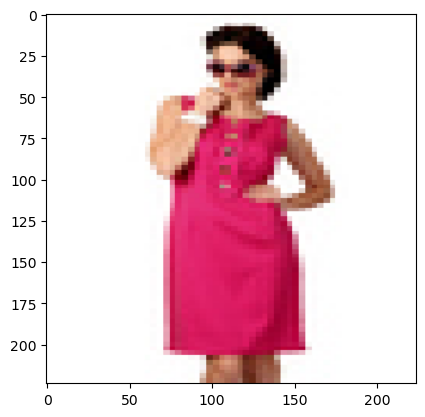

1/1 [==============================] - 0s 114ms/step
-----------------------------------------------------------------------
most similar products:


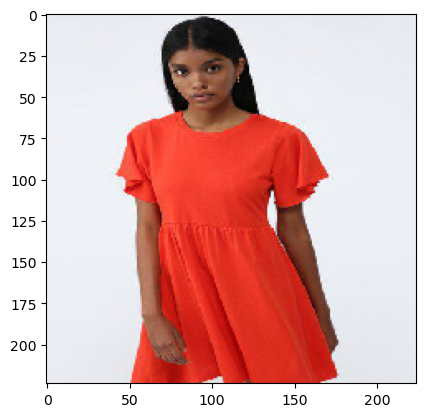

similarity score :  0.6105137


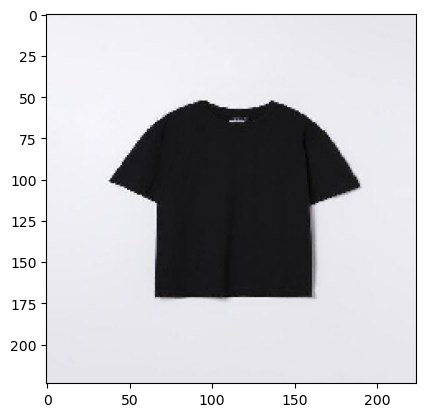

similarity score :  0.5983692


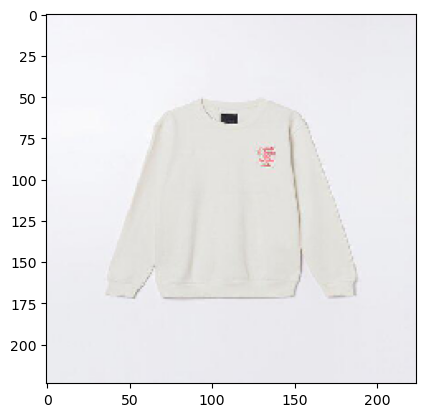

similarity score :  0.5946813


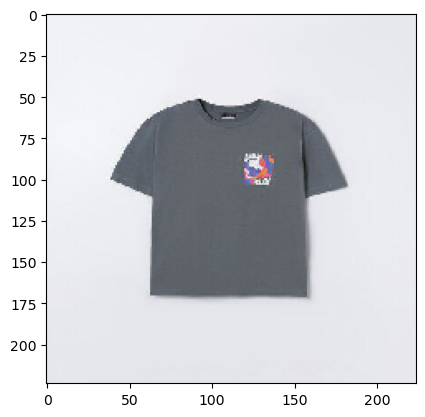

similarity score :  0.5776143


In [28]:
retrieve_most_similar_products("59990.jpg")

-----------------------------------------------------------------------
original product:


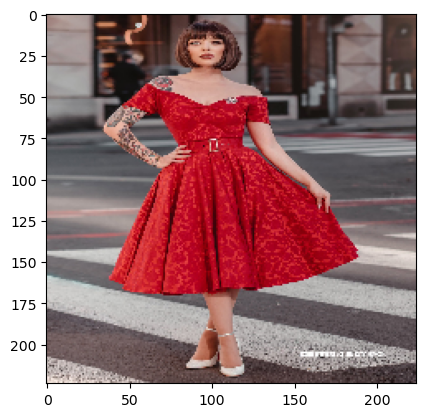

1/1 [==============================] - 0s 118ms/step
-----------------------------------------------------------------------
most similar products:


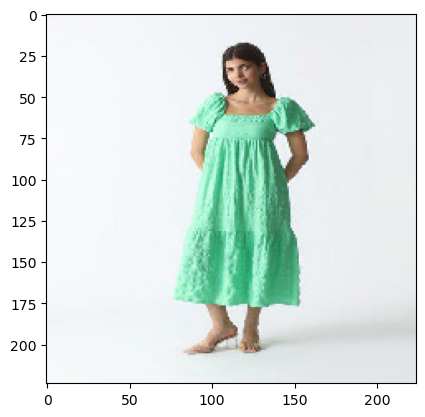

similarity score :  0.5716426


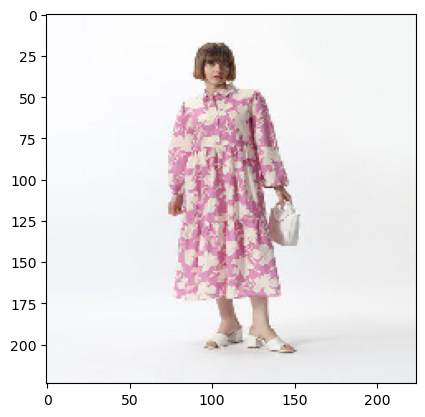

similarity score :  0.5408528


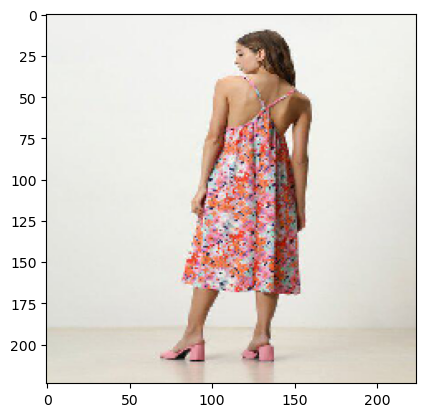

similarity score :  0.5354073


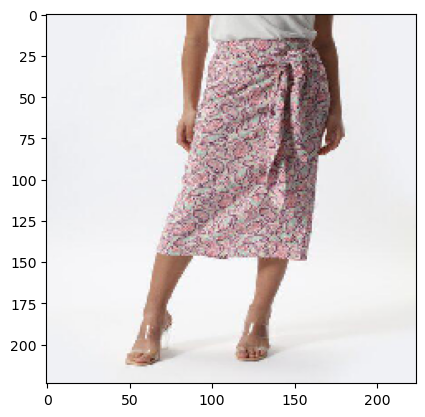

similarity score :  0.53276676


In [29]:
retrieve_most_similar_products("test2.jpg")

-----------------------------------------------------------------------
original product:


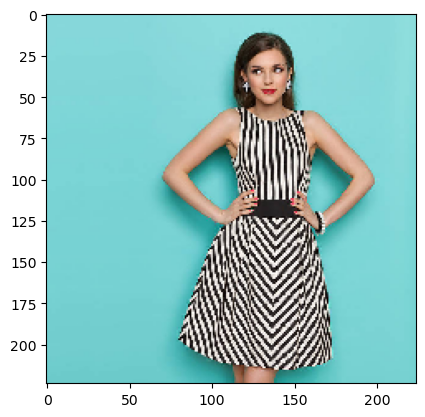

1/1 [==============================] - 0s 115ms/step
-----------------------------------------------------------------------
most similar products:


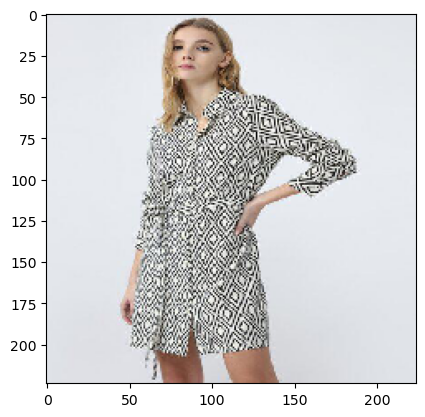

similarity score :  0.6210081


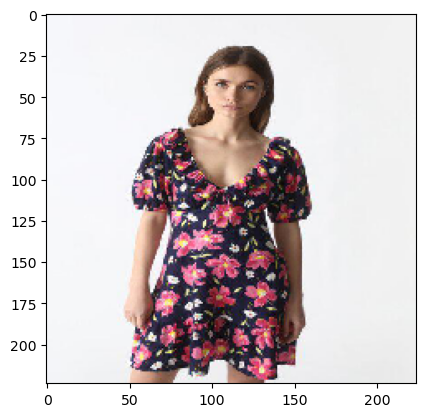

similarity score :  0.6118436


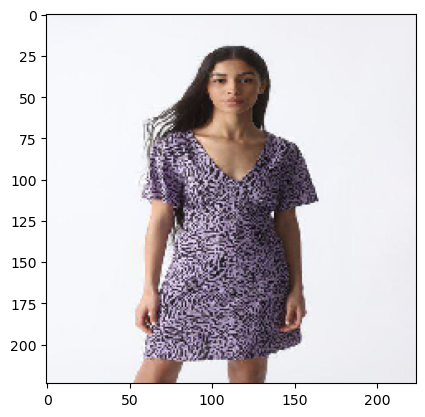

similarity score :  0.610608


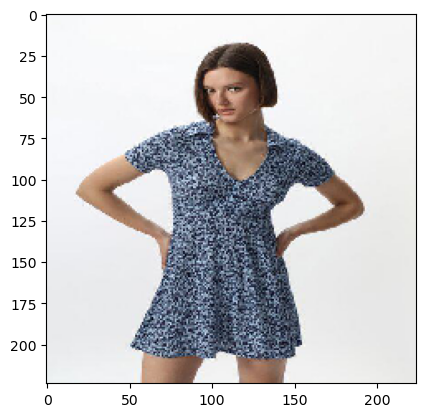

similarity score :  0.6101985


In [30]:
retrieve_most_similar_products("test.jpg")

-----------------------------------------------------------------------
original product:


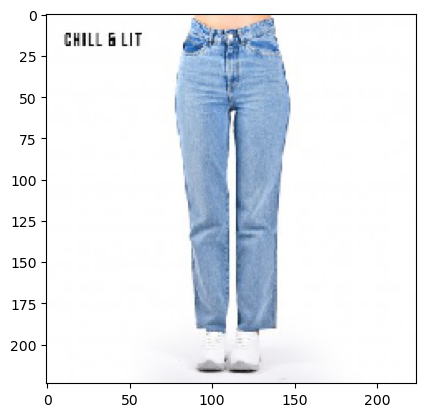

1/1 [==============================] - 0s 113ms/step
-----------------------------------------------------------------------
most similar products:


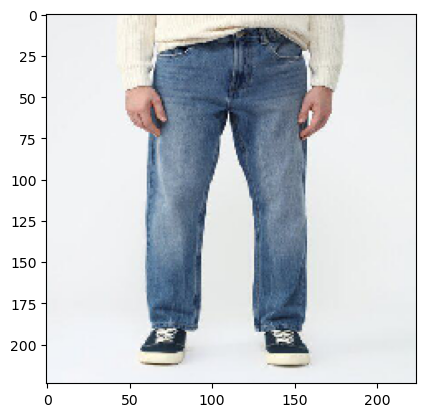

similarity score :  0.80740505


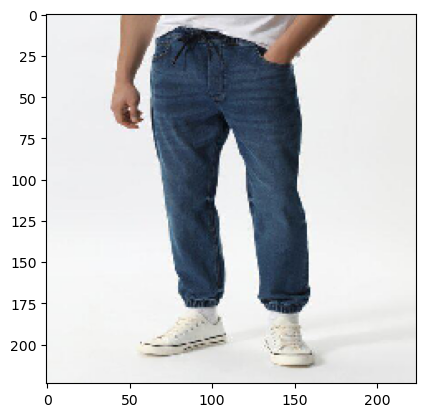

similarity score :  0.79126734


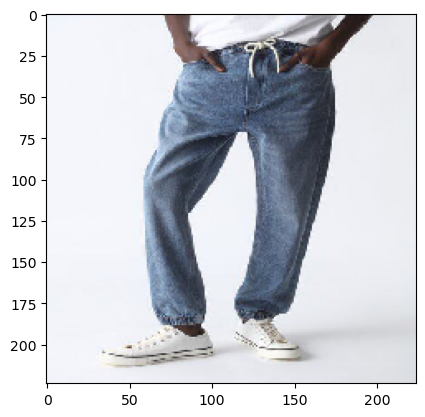

similarity score :  0.77753973


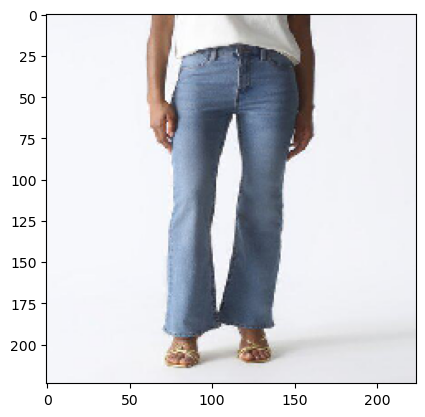

similarity score :  0.7538457


In [31]:
retrieve_most_similar_products("test3.jpg")

-----------------------------------------------------------------------
original product:


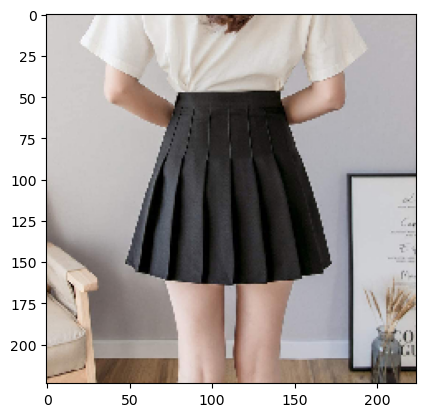

1/1 [==============================] - 0s 158ms/step
-----------------------------------------------------------------------
most similar products:


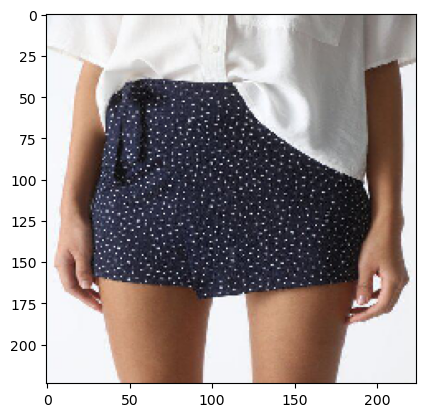

similarity score :  0.7029482


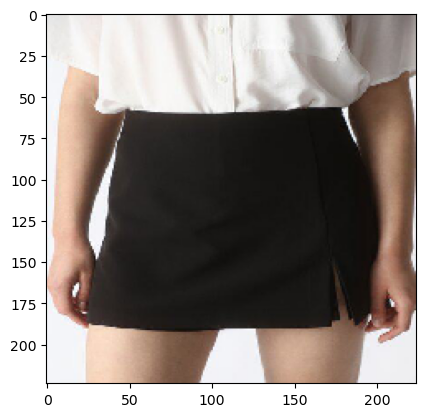

similarity score :  0.6957668


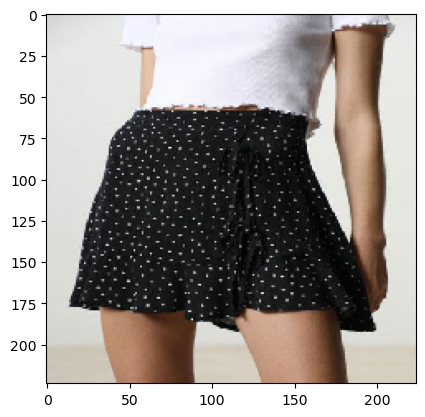

similarity score :  0.6706829


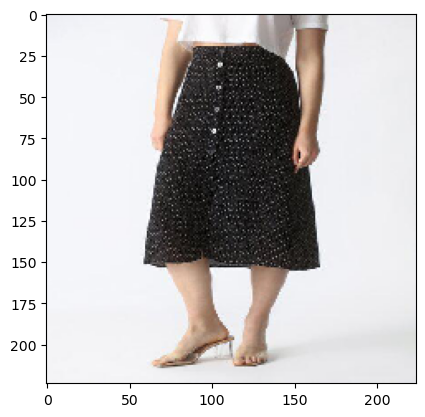

similarity score :  0.6674794


In [32]:
retrieve_most_similar_products("test4.jpg")

In [35]:
print('average time = ', sum(time_)/len(time_))

average time =  0.8606038570404053
